In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem statement.

Build a recommender system by using cosine simillarties score.


In [3]:
import pandas as pd
import numpy as np

In [4]:
book=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/book (3).csv",engine="python")

In [5]:
book.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [6]:
book_new = book.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis =1)
book_new.head()

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [7]:
len(book_new['user_id'].unique())

2182

In [8]:
book_new.shape

(10000, 4)

In [9]:
len(book_new['book_title'].unique())

9659

In [10]:
book_df =book_new.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und sch�?¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,N

In [11]:
book_df.fillna(0, inplace=True)
book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und sch�?¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0

In [12]:
C = book['Book.Rating'].mean()
print(C)

7.5663


In [13]:
m = book['Book.Rating'].quantile(0.90)
print(m)

10.0


In [14]:
q_Books = book.copy().loc[book['Book.Rating'] >= m]
q_Books.shape

(1732, 4)

In [15]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [16]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [17]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [19]:

#Store the results in a dataframe
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = book_new.user_id.unique()
uc_sim_df.columns = book_new.user_id.unique()

In [20]:
uc_sim_df.shape

(2182, 2182)

In [21]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
u=book_new[(book_new['user_id']==276726) | (book_new['user_id']==17)]
u

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [23]:
user_1=book_new[(book_new['user_id']==276726)] 
user_1

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5


In [24]:
user_2=book_new[(book_new['user_id']==17)] 
user_2

,Unnamed: 0,user_id,book_title,book_rating
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [25]:
indices = pd.Series(book_new.index, index=book_new['book_title']).drop_duplicates()

In [26]:
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [27]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(book_title, cosine_sim=uc_sim):
    # Get the index of the books that matches the title
    idx = indices[book_title]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:11]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return book_new['book_title'].iloc[books_indices]

In [28]:
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [29]:
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [30]:
pd.merge(user_1,user_2,on='book_rating',how='outer')

,Unnamed: 0_x,user_id_x,book_title_x,book_rating,Unnamed: 0_y,user_id_y,book_title_y
0,1.0,276726.0,Classical Mythology,5,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,NaN,7,2414,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,NaN,6,2416,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,NaN,3,2417,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [31]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]  

In [32]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

In [33]:
#Finding the correlation with different movies
similar_to_book = book_df.corrwith(book_user_rating)

In [34]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [35]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [36]:
ratings_mean_count = pd.DataFrame(book_new.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book_new.groupby('book_title')['book_rating'].count())

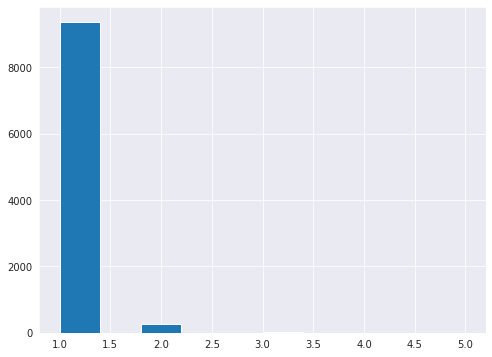

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

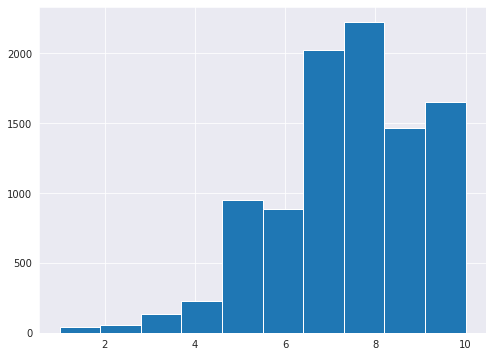

In [38]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10)

<Figure size 576x432 with 0 Axes>

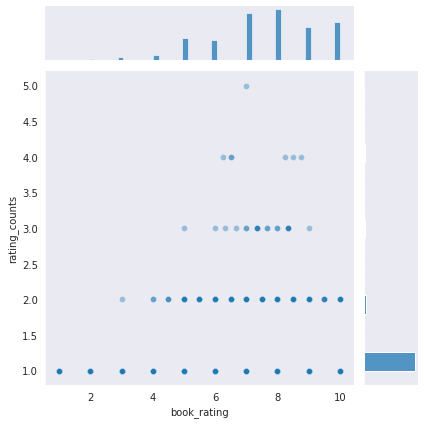

In [39]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='book_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

Conclusion:-
From the output you can see that the Books that have high correlation with are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those Books and only other books and rated them same.
